<a href="https://colab.research.google.com/github/MD2001/Pytorch_Bignnier/blob/main/01_pytoirch_WorkFlow_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##redoit agine
this part all use only the function for demonstarate the data but do all it aginen but cleaner way

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
#make digonistic device code
device="cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

#**1.Data**

In [11]:
# add the parameters for the data
wight=0.8
bais=0.2

# the range of data
start=0.01
end=1
step=0.01

data=torch.arange(start,end,step).unsqueeze(dim=1)
result = data*wight+bais

Spliter_data = (int) (0.8*len(data))

x_train,y_train=data[Spliter_data:],result[Spliter_data:]
x_test,y_test=data[:Spliter_data],result[:Spliter_data]

x_train[:5],y_train[:5]

(tensor([[0.8000],
         [0.8100],
         [0.8200],
         [0.8300],
         [0.8400]]),
 tensor([[0.8400],
         [0.8480],
         [0.8560],
         [0.8640],
         [0.8720]]))

In [12]:
def plot_predictions(train_data=x_train,
                      train_labels=y_train,
                      test_data=x_test,
                      test_labels=y_test,
                      predictions=None):
    """
    Plot training data and test data along with predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()

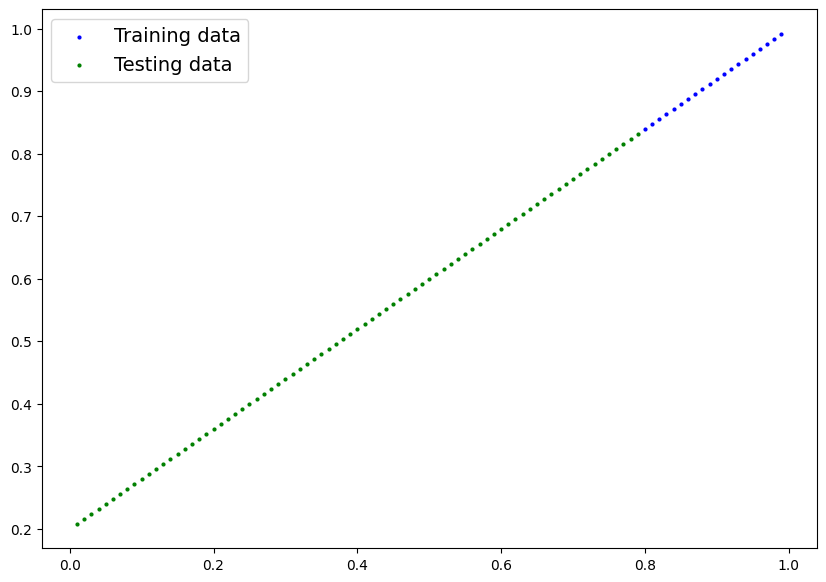

In [13]:
plot_predictions()